In [3]:
import matplotlib.pyplot as plt
# setting matplotlib style defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
# import pandas and tensorflow
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

## A Single Neuron 

In [22]:
# .csv downloaded from Kaggle
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
red_wine.shape # determine number of columns to use for features

(1599, 12)

In [24]:
# input shape is your number of features. in this case my target is quality, with 11 features.
input_shape = [red_wine.shape[1]-1]

In [25]:
# create a linear learning model. unit is the number of outputs, and input shape is features
model = keras.Sequential([layers.Dense(units=1, input_shape=input_shape)])

In [11]:
model

In [28]:
# feature weights
w, b = model.weights
print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense_4/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.23321724],
       [-0.21341157],
       [ 0.68584365],
       [ 0.04189461],
       [-0.49463978],
       [ 0.21980292],
       [-0.70646024],
       [ 0.3506754 ],
       [ 0.38109058],
       [-0.11858284],
       [-0.15076923]], dtype=float32)>

Bias
<tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


> These weights are first selected randomly. This is a very simple model right now, but eventually a deep learning model would begin to change weights with every iteration to help with prediction.

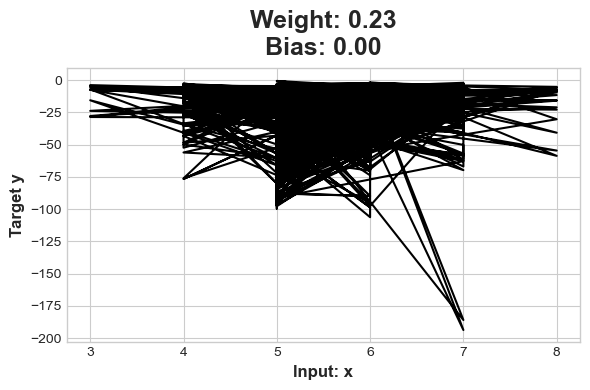

In [27]:
# Here's an attempt to graph the weights of the prediction and actual, but it didnt exactly turn out well
x = red_wine['quality']
y = model.predict(red_wine.drop(columns = 'quality'))

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

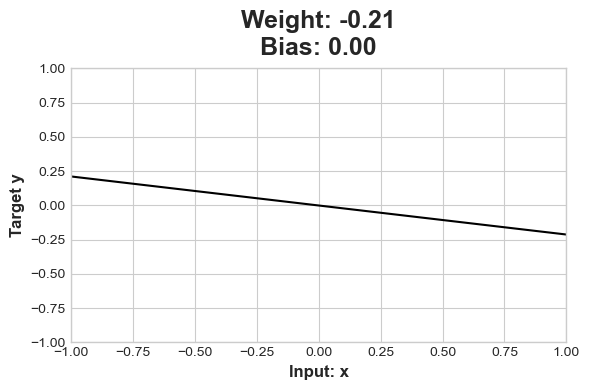

In [29]:
# This one shows hohw weights change the regression line in a simple linear deep learning model
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

## Deep Neural Networks